<a href="https://colab.research.google.com/github/Neyaz786/VoltEdge-data-analysis/blob/main/voltedge_python_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_product = pd.read_excel('/content/07_15_2025 VoltEdge Case Study Problem Statement v1.0.xlsx', sheet_name = 1, header = 1)
df_stores = pd.read_excel('/content/07_15_2025 VoltEdge Case Study Problem Statement v1.0.xlsx', sheet_name = 2,  header = 2)


### Que 2


In [ ]:
# df_product['Date'].loc[680] = '2024'

In [ ]:
df_product.head()

,Unnamed: 0,Store ID,Product Code,Date,Units Sold,Revenue,Product Cost
0,NaN,S001,A-CH002,2024-02-10 00:00:00,25,4574.50,3475.25
1,NaN,S001,S-ST013,2024-02-23 00:00:00,28,11176.48,8445.92
2,NaN,S001,A-KE020,2023-07-17 00:00:00,10,3411.70,2034.70
3,NaN,S001,L-GA036,2024-07-28 00:00:00,3,1442.10,905.82
4,NaN,S001,H-WI042,2024-02-28 00:00:00,21,18551.40,12694.29


In [ ]:
import datetime
df_product.loc[3023, "Date"] = datetime.datetime(2024, 3, 14, 0, 0)


In [ ]:
df_product['Date'].loc[3023]

'14-15-2024'

In [ ]:
df_product["Date"] = pd.to_datetime(df_product["Date"])

In [ ]:

df_product.groupby(df_product["Date"].dt.year)['Revenue'].sum()

,Revenue
Date,
2023,20380720.86
2024,33102893.32


In [ ]:

df_cop = pd.read_excel('/content/cop_procdna.xlsx')

In [ ]:
df_cop['2023'].sum(), df_cop['2024'].sum()

(np.int64(2219687), np.int64(4930379))

In [ ]:
df_product

,Unnamed: 0,Store ID,Product Code,Date,Units Sold,Revenue,Product Cost
0,NaN,S001,A-CH002,2024-02-10,25,4574.50,3475.25
1,NaN,S001,S-ST013,2024-02-23,28,11176.48,8445.92
2,NaN,S001,A-KE020,2023-07-17,10,3411.70,2034.70
3,NaN,S001,L-GA036,2024-07-28,3,1442.10,905.82
4,NaN,S001,H-WI042,2024-02-28,21,18551.40,12694.29
...,...,...,...,...,...,...,...
4014,NaN,S019,L-UL031,2024-09-04,15,9108.45,5585.10
4015,NaN,S019,A-CH039,2023-06-12,11,9658.77,6654.67
4016,NaN,S019,S-FI050,2023-06-06,19,20020.11,12398.83
4017,NaN,S019,H-WI029,2024-08-01,5,6378.05,3976.95


In [ ]:
# mrg_Df = pd.merge(df_product, df_cop, on = 'Store ID')
# mrg_Df.rename(columns={"2023": "COP_2023", "2024": "COP_2024"}, inplace = True)
# mrg_Df.head()

In [ ]:
## Profit = Revenue – Product Cost – Cost of Operations (during relevant timeframe)
# df_2 = mrg_Df.groupby(df_product["Date"].dt.year)[['Revenue', 'Product Cost' ,'COP_2023', 'COP_2024']].sum().reset_index().rename(columns = {'Date': 'Year'})

In [ ]:
df_2 = df_product.groupby(df_product["Date"].dt.year)[['Revenue', 'Product Cost', ]].sum().reset_index().rename(columns = {'Date': 'Year'})

# (np.int64(2219687), np.int64(4930379))  COP of 2023, 2024
df_2.loc[0, 'COP_2023'] = 2219687
df_2.loc[1, 'COP_2024'] = 4930379
df_2.fillna(0, inplace=True)

In [ ]:
df_2

,Year,Revenue,Product Cost,COP_2023,COP_2024
0,2023,20380720.86,14227963.83,2219687.0,0.0
1,2024,33102893.32,22822271.84,0.0,4930379.0


In [ ]:
df_2['Profit'] =  df_2['Revenue'] - df_2['Product Cost'] - df_2['COP_2023'] - df_2['COP_2024']

In [ ]:
df_2['Profitability'] = df_2['Profit'] / df_2['Revenue']
df_2

,Year,Revenue,Product Cost,COP_2023,COP_2024,Profit,Profitability
0,2023,20380720.86,14227963.83,2219687.0,0.0,3933070.03,0.192980
1,2024,33102893.32,22822271.84,0.0,4930379.0,5350242.48,0.161625


In [ ]:
df_2[['Revenue', 'Profit', 'Profitability']]

,Revenue,Profit,Profitability
0,20380720.86,3933070.03,0.192980
1,33102893.32,5350242.48,0.161625


In [ ]:
# 2(b)
df_2b = df_product.groupby(df_product["Date"].dt.to_period("Q"))[['Revenue', 'Product Cost']].sum().reset_index().rename(columns = {'Date': 'Quarter'})
df_2b.loc[0, 'COP_2023Q1'] = 817335
df_2b.loc[1, 'COP_2023Q2'] = 358313
df_2b.loc[2, 'COP_2023Q3'] = 355612
df_2b.loc[3, 'COP_2023Q4'] = 688427
df_2b.loc[4, 'COP_2024Q1'] = 276277
df_2b.loc[5, 'COP_2024Q2'] = 240306
df_2b.loc[6, 'COP_2024Q3'] = 252002
df_2b.loc[7, 'COP_2024Q4'] = 4161794
df_2b.fillna(0, inplace = True)
#



In [ ]:
df_2b['Profit'] =  df_2b['Revenue'] - df_2b['Product Cost'] - df_2b['COP_2023'] - df_2b['COP_2024']

,Quarter,Revenue,Product Cost,COP_2023Q1,COP_2023Q2,COP_2023Q3,COP_2023Q4,COP_2024Q1,COP_2024Q2,COP_2024Q3,COP_2024Q4
0,2023Q1,4921190.30,3433314.88,817335.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023Q2,3488623.29,2444659.53,0.0,358313.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023Q3,3861727.24,2714003.40,0.0,0.0,355612.0,0.0,0.0,0.0,0.0,0.0
3,2023Q4,8109180.03,5635986.02,0.0,0.0,0.0,688427.0,0.0,0.0,0.0,0.0
4,2024Q1,8605563.19,5908624.09,0.0,0.0,0.0,0.0,276277.0,0.0,0.0,0.0
5,2024Q2,5260501.44,3644547.79,0.0,0.0,0.0,0.0,0.0,240306.0,0.0,0.0
6,2024Q3,5611467.29,3863784.49,0.0,0.0,0.0,0.0,0.0,0.0,252002.0,0.0
7,2024Q4,13625361.40,9405315.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4161794.0


In [ ]:
# 817335	358313	355612	688427	276277	240306	252002	4161794 quarter wise cop
def calculate_profit(row):
    cop_column = f"COP_{row['Quarter']}"
    cost_of_ops = row[cop_column] if cop_column in row else 0
    return row["Revenue"] - row["Product Cost"] - cost_of_ops

df_2b["Profit"] = df_2b.apply(calculate_profit, axis=1)
df_2b['Profitability'] = df_2b['Profit'] / df_2b['Revenue']
df_2b[['Revenue', 'Profit', 'Profitability']]

,Revenue,Profit,Profitability
0,4921190.30,670540.42,0.136256
1,3488623.29,685650.76,0.196539
2,3861727.24,792111.84,0.205119
3,8109180.03,1784767.01,0.220092
4,8605563.19,2420662.10,0.281290
5,5260501.44,1375647.65,0.261505
6,5611467.29,1495680.80,0.266540
7,13625361.40,58251.93,0.004275


In [ ]:
import matplotlib.pyplot as plt

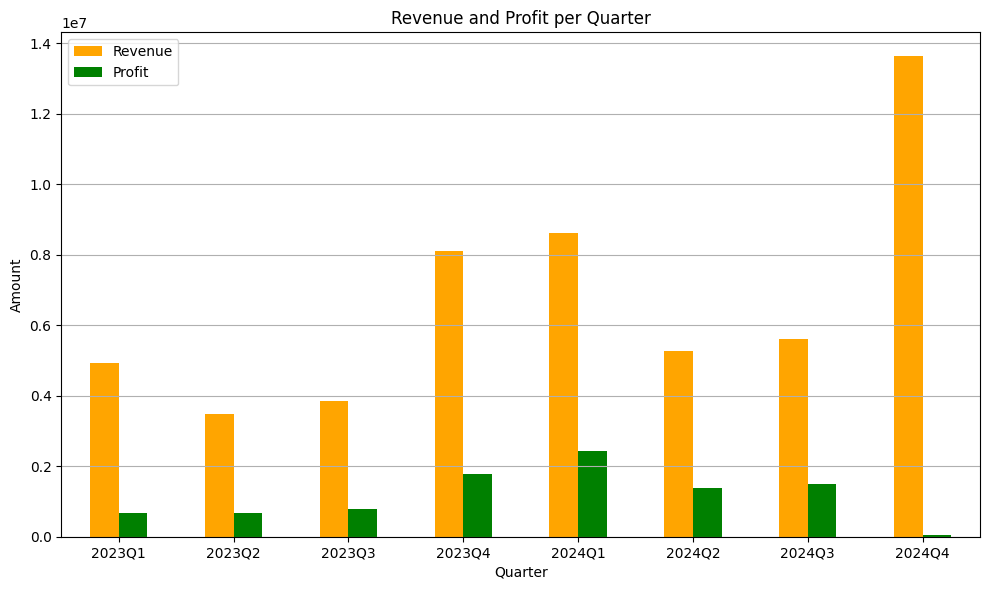

In [ ]:
df_2b.set_index("Quarter")[["Revenue", "Profit"]].plot(kind="bar", figsize=(10, 6), color = ['Orange', 'Green'])
plt.title("Revenue and Profit per Quarter")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


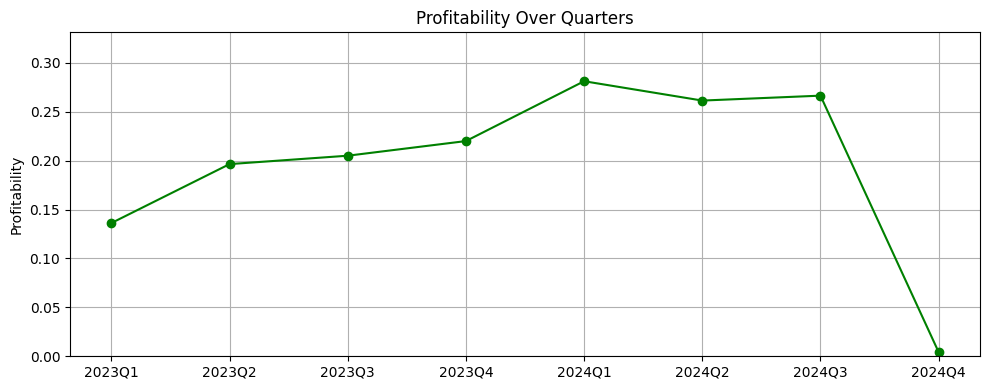

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df_2b["Quarter"].astype('str'), df_2b["Profitability"], marker='o', color='green')
plt.title("Profitability Over Quarters")
plt.ylabel("Profitability")
plt.ylim(0, df_2b["Profitability"].max() + 0.05)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:


import plotly.express as px
x = df_2b['Quarter'].astype('str')

fig = px.line(
    df_2b,
    x=x,
    y="Profitability",
    title="Profitability Over Quarters",
    markers=True,
    line_shape="linear"
)

fig.update_layout(
    yaxis_title="Profitability",
    xaxis_title="Quarter",
    yaxis=dict(range=[0, df_2b["Profitability"].max() + 0.05]),
    template="plotly_white",
    width=800,
    height=400
)

fig.show()


In [ ]:
# 2c

# df_product.groupby(df_product["Store ID"])['Revenue'].sum().reset_index()

pd.merge(df_product.groupby(df_product["Store ID"])['Revenue'].sum().reset_index(), df_stores, on = 'Store ID', how = 'right').sort_values(by = 'Revenue', ascending = False).head(3)[['Store ID', 'Revenue', 'City']]

,Store ID,Revenue,City
0,S001,13904972.92,Los Angeles
12,S013,2836834.69,Raleigh
2,S003,2830114.42,Chicago


### Que 3

In [ ]:
df_details = pd.read_excel('/content/07_15_2025 VoltEdge Case Study Problem Statement v1.0.xlsx', sheet_name = 3, header = 1)

In [ ]:
df_3a = pd.merge(df_product, df_details, on = 'Product Code')

In [ ]:
df_3a['Year'] = df_3a['Date'].dt.year

In [ ]:
df_3a_brand = df_3a.groupby(['Year', 'Brand'])[['Selling Price', 'Cost to VoltEdge']].sum().reset_index()

df_3a_brand['Profit'] = df_3a_brand['Selling Price'] - df_3a_brand['Cost to VoltEdge']
df_3a_brand

,Year,Brand,Selling Price,Cost to VoltEdge,Profit
0,2023,ASUS,113618.52,82929.09,30689.43
1,2023,Apple,129718.68,81428.76,48289.92
2,2023,Bose,52125.91,36349.31,15776.60
3,2023,Dell,9283.27,6719.61,2563.66
4,2023,HP,38313.52,25857.43,12456.09
5,2023,Samsung,49716.20,36588.64,13127.56
6,2023,Sony,175932.36,124248.84,51683.52
7,2023,VoltEdge,479148.45,339763.34,139385.11
8,2024,ASUS,26818.87,19877.41,6941.46
9,2024,Apple,232261.39,144478.45,87782.94


In [ ]:
df_3a_Cate = df_3a.groupby(['Year', 'Product Category'])[['Selling Price', 'Cost to VoltEdge']].sum().reset_index()

df_3a_Cate['Profit'] = df_3a_Cate['Selling Price'] - df_3a_Cate['Cost to VoltEdge']
df_3a_Cate

,Year,Product Category,Selling Price,Cost to VoltEdge,Profit
0,2023,Accessories,273778.82,190508.27,83270.55
1,2023,Gaming Consoles,334854.48,235114.61,99739.87
2,2023,Headphones,167639.81,122549.11,45090.70
3,2023,Laptops,62567.61,45206.92,17360.69
4,2023,Smart Gadgets,209016.19,140506.11,68510.08
5,2024,Accessories,413129.95,292195.74,120934.21
6,2024,Gaming Consoles,527148.78,379120.03,148028.75
7,2024,Headphones,337724.84,228906.49,108818.35
8,2024,Laptops,168244.52,106847.59,61396.93
9,2024,Smart Gadgets,424348.67,280205.01,144143.66


In [ ]:
df_3a

,Unnamed: 0,Store ID,Product Code,Date,Units Sold,Revenue,Product Cost,Product Name,Product Category,Subcategory,Brand,Cost to VoltEdge,Selling Price,Year
0,NaN,S010,L-GA004,2023-03-31,9,2986.92,1779.39,Samsung Gaming Laptops Model 384,Laptops,Gaming Laptops,Samsung,197.71,331.88,2023
1,NaN,S015,L-UL031,2024-09-23,1,607.23,372.34,VoltEdge Ultrabooks Model 845,Laptops,Ultrabooks,VoltEdge,372.34,607.23,2024
2,NaN,S007,A-CH045,2024-08-17,9,6046.65,4775.31,VoltEdge Chargers Model 318,Accessories,Chargers,VoltEdge,530.59,671.85,2024
3,NaN,S019,A-CH039,2023-07-05,20,17561.40,12099.40,Sony Chargers Model 151,Accessories,Chargers,Sony,604.97,878.07,2023
4,NaN,S004,H-NO016,2023-03-01,21,18553.29,12937.89,Bose Noise-Canceling Over-Ear Model 490,Headphones,Noise-Canceling Over-Ear,Bose,616.09,883.49,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,NaN,S009,H-NO016,2023-12-18,43,37990.07,26491.87,Bose Noise-Canceling Over-Ear Model 490,Headphones,Noise-Canceling Over-Ear,Bose,616.09,883.49,2023
4015,NaN,S011,A-CH002,2024-11-09,28,5123.44,3892.28,Sony Chargers Model 130,Accessories,Chargers,Sony,139.01,182.98,2024
4016,NaN,S008,S-FI037,2024-02-06,15,22071.90,14934.75,VoltEdge Fitness Bands Model 848,Smart Gadgets,Fitness Bands,VoltEdge,995.65,1471.46,2024
4017,NaN,S017,G-GA018,2024-04-28,10,8066.60,4810.40,VoltEdge Game Consoles Model 261,Gaming Consoles,Game Consoles,VoltEdge,481.04,806.66,2024


In [ ]:
#brand and year wise market share

df_product['Date'] = pd.to_datetime(df_product['Date'])
df_product['Year'] = df_product['Date'].dt.year


merged_df = df_product.merge(df_details[['Product Code', 'Brand']], on='Product Code', how='left')
brand_revenue = merged_df.groupby(['Year', 'Brand'])['Revenue'].sum().reset_index()

total_revenue_by_year = brand_revenue.groupby('Year')['Revenue'].sum().reset_index()
total_revenue_by_year.rename(columns={'Revenue': 'Total_Revenue'}, inplace=True)

brand_revenue = brand_revenue.merge(total_revenue_by_year, on='Year')
brand_revenue['Market Share'] = (brand_revenue['Revenue'] / brand_revenue['Total_Revenue']) * 100


market_share_pivot = brand_revenue.pivot(index='Brand', columns='Year', values='Market Share').reset_index()
market_share_pivot.columns.name = None

market_share_pivot

,Brand,2023,2024
0,ASUS,10.716313,1.802313
1,Apple,12.961631,12.708115
2,Bose,4.894136,14.538887
3,Dell,0.887681,10.353317
4,HP,3.823349,13.726316
5,Samsung,4.569454,2.437752
6,Sony,16.532826,8.134895
7,VoltEdge,45.614609,36.298405


In [ ]:
# Category and year wise market share

df_product['Date'] = pd.to_datetime(df_product['Date'])
df_product['Year'] = df_product['Date'].dt.year


merged_df = df_product.merge(df_details[['Product Code', 'Product Category']], on='Product Code', how='left')
Catg_revenue = merged_df.groupby(['Year', 'Product Category'])['Revenue'].sum().reset_index()

total_revenue_by_year = Catg_revenue.groupby('Year')['Revenue'].sum().reset_index()
total_revenue_by_year.rename(columns={'Revenue': 'Total_Revenue'}, inplace=True)

Catg_revenue = Catg_revenue.merge(total_revenue_by_year, on='Year')
Catg_revenue['Market Share'] = (Catg_revenue['Revenue'] / Catg_revenue['Total_Revenue']) * 100


market_share_Cat = Catg_revenue.pivot(index='Product Category', columns='Year', values='Market Share').reset_index()
market_share_Cat.columns.name = None

market_share_Cat

,Product Category,2023,2024
0,Accessories,25.605686,21.239015
1,Gaming Consoles,33.051445,29.470114
2,Headphones,16.014561,18.359929
3,Laptops,5.899570,8.684606
4,Smart Gadgets,19.428738,22.246337


### Que 4


In [ ]:
# df_4 =
df_4 = df_3a.groupby(['Subcategory'])[['Selling Price', 'Cost to VoltEdge']].sum()

df_4['Profit'] = df_4['Selling Price'] - df_4['Cost to VoltEdge']

df_4['Revenue'] =  df_3a.groupby(['Subcategory'])['Revenue'].sum()
df_4['Profitability'] = df_4['Profit'] / df_4['Revenue']
df_4.reset_index(inplace = True)
df_4['Revenure Share'] = df_4['Revenue'] / df_4['Revenue'].sum()

df_4[['Subcategory', 'Profitability', 'Revenure Share']]

,Subcategory,Profitability,Revenure Share
0,Chargers,0.015236,0.072622
1,Fitness Bands,0.018392,0.101978
2,Game Consoles,0.016847,0.173023
3,Gaming Headsets,0.008670,0.028593
4,Gaming Laptops,0.018747,0.038352
5,Keyboards,0.018803,0.125444
6,Laptop Sleeves,0.008948,0.003364
7,Mice,0.011696,0.027600
8,Noise-Canceling Over-Ear,0.015171,0.031678
9,Smart Speakers,0.018073,0.007339


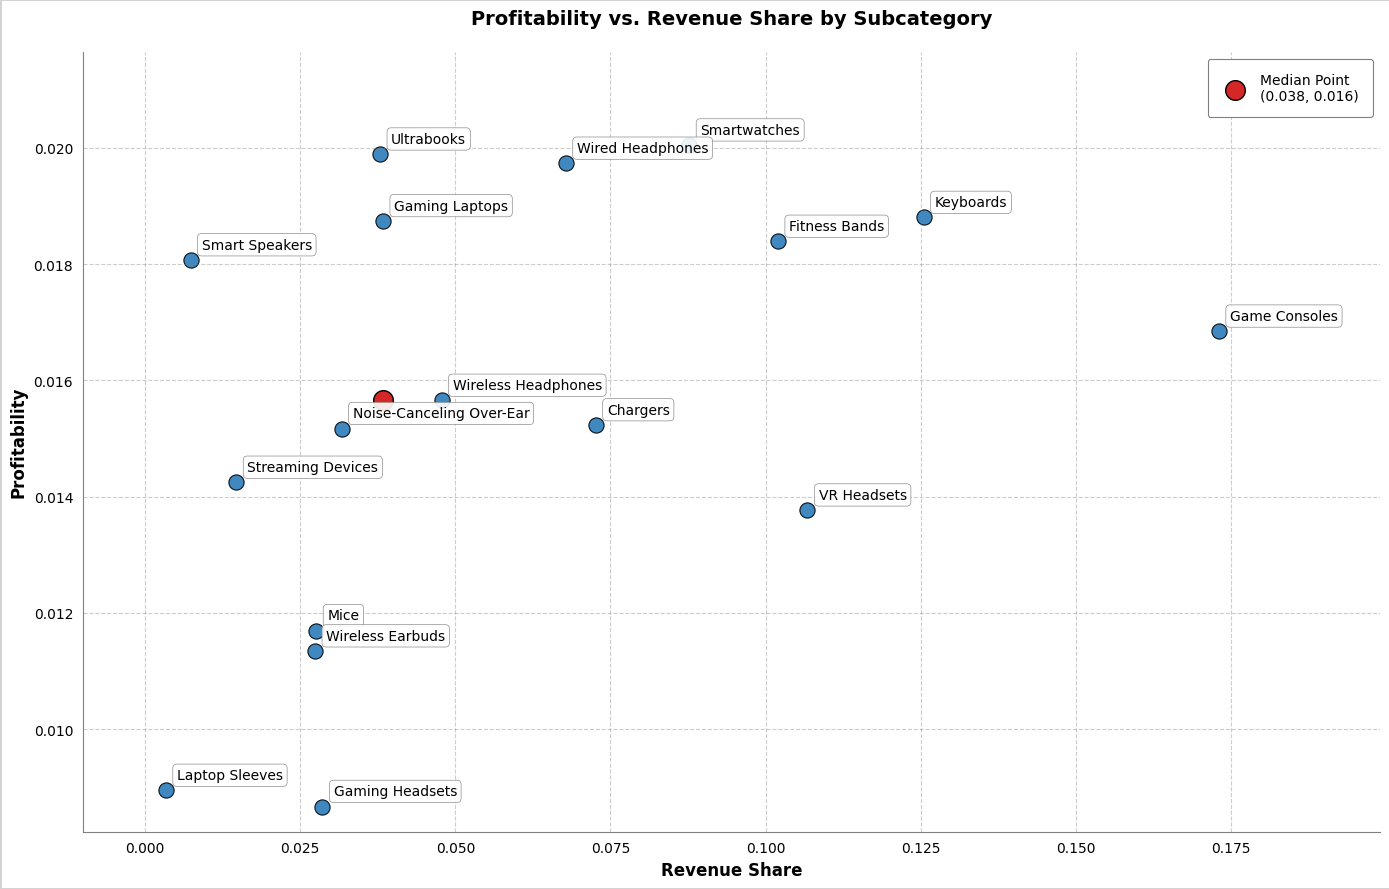

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
data = {
    'Subcategory': ['Chargers', 'Fitness Bands', 'Game Consoles', 'Gaming Headsets',
                   'Gaming Laptops', 'Keyboards', 'Laptop Sleeves', 'Mice',
                   'Noise-Canceling Over-Ear', 'Smart Speakers', 'Smartwatches',
                   'Streaming Devices', 'Ultrabooks', 'VR Headsets',
                   'Wired Headphones', 'Wireless Earbuds', 'Wireless Headphones'],
    'Profitability': [0.015236, 0.018392, 0.016847, 0.008670, 0.018747, 0.018803,
                     0.008948, 0.011696, 0.015171, 0.018073, 0.020049, 0.014247,
                     0.019893, 0.013770, 0.019735, 0.011346, 0.015657],
    'Share': [0.072622, 0.101978, 0.173023, 0.028593, 0.038352, 0.125444,
             0.003364, 0.027600, 0.031678, 0.007339, 0.087692, 0.014717,
             0.037882, 0.106732, 0.067796, 0.027402, 0.047786]
}

df = pd.DataFrame(data)

# Calculate medians for origin point
median_revenue_share = np.median(df['Share'])
median_profitability = np.median(df['Profitability'])

# Create figure with white background
plt.figure(figsize=(14, 9), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

# Custom styling for points
plt.scatter(df['Share'], df['Profitability'],
            color='#2b7bba', alpha=0.9, s=120,
            edgecolor='black', linewidth=0.8)

# Add origin point (median values)
plt.scatter(median_revenue_share, median_profitability,
            color='#d62728', s=200,
            label=f'Median Point\n({median_revenue_share:.3f}, {median_profitability:.3f})',
            edgecolor='black', linewidth=1, zorder=3)

# Add labels and title with improved visibility
plt.xlabel('Revenue Share', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Profitability', fontsize=12, fontweight='bold', color='black')
plt.title('Profitability vs. Revenue Share by Subcategory',
          fontsize=14, fontweight='bold', pad=20, color='black')

# Add grid with subtle lines
plt.grid(True, linestyle='--', alpha=0.4, color='gray')

# Add legend with improved visibility
legend = plt.legend(facecolor='white', edgecolor='gray',
                    framealpha=1, fontsize=10,
                    borderpad=1, labelcolor='black')
legend.get_frame().set_linewidth(0.8)

# Add annotations with improved visibility
for i, row in df.iterrows():
    ax.annotate(row['Subcategory'],
                (row['Share'], row['Profitability']),
                textcoords="offset points",
                xytext=(8, 8),
                ha='left',
                fontsize=10,
                color='black',
                bbox=dict(boxstyle='round,pad=0.3',
                         fc='white',
                         ec='gray',
                         lw=0.5,
                         alpha=0.9))

# Adjust axis limits
plt.xlim(-0.01, df['Share'].max() * 1.15)
plt.ylim(df['Profitability'].min() * 0.95, df['Profitability'].max() * 1.08)

# Customize ticks
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

# Add light gray border around entire plot
plt.gcf().patch.set_edgecolor('lightgray')
plt.gcf().patch.set_linewidth(1)

plt.tight_layout()
plt.show()

### Que 5.1

In [ ]:
pivot_df_5 = df_product.groupby(['Year', 'Store ID'])['Revenue'].sum().reset_index()
pivot_df_5 = pivot_df_5.pivot(index='Store ID', columns='Year', values='Revenue').reset_index()

pivot_df_5.columns.name = None
pivot_df_5.columns = ['Active Stores', '2023 Revenue', '2024 Revenue']


pivot_df_5['YoY Revenue Growth'] = (
    (pivot_df_5['2024 Revenue'] - pivot_df_5['2023 Revenue']) / pivot_df_5['2023 Revenue']
) * 100

# Step 4: Round the growth values (optional)
pivot_df_5['YoY Revenue Growth'] = pivot_df_5['YoY Revenue Growth'].round(2)

pivot_df_5

,Active Stores,2023 Revenue,2024 Revenue,YoY Revenue Growth
0,S001,5605074.86,8299898.06,48.08
1,S002,912213.74,1331320.33,45.94
2,S003,930576.48,1899537.94,104.12
3,S004,961483.70,1772761.70,84.38
4,S005,801496.87,1768163.49,120.61
5,S006,1.00,NaN,NaN
6,S007,1013577.51,1717857.73,69.48
7,S008,687384.64,1511853.75,119.94
8,S009,1128220.31,1660963.71,47.22
9,S010,1064083.72,1470672.26,38.21


In [ ]:
# Convert 'Date' column to datetime if not already
df_product['Date'] = pd.to_datetime(df_product['Date'])

# Extract year
df_product['Year'] = df_product['Date'].dt.year

# Group by Store and Year to get total revenue
store_revenue = df_product.groupby(['Year', 'Store ID'])['Revenue'].sum().reset_index()

# Total revenue by year (all stores)
total_revenue_by_year = store_revenue.groupby('Year')['Revenue'].sum().reset_index()
total_revenue_by_year.rename(columns={'Revenue': 'Total_Revenue'}, inplace=True)

# Merge to calculate store-wise market share
store_revenue = store_revenue.merge(total_revenue_by_year, on='Year')
store_revenue['Market Share'] = (store_revenue['Revenue'] / store_revenue['Total_Revenue']) * 100

# Optional: Pivot for side-by-side year comparison
store_market_share = store_revenue.pivot(index='Store ID', columns='Year', values='Market Share').reset_index()
store_market_share.columns.name = None  # clean column name


store_market_share.rename({
    2023: '2023 Market Share',
    2024: '2024 Market Share'
}, axis=1, inplace=True)

store_market_share['Market Share Delta'] = np.abs(store_market_share['2024 Market Share'] - store_market_share['2023 Market Share'])
store_market_share

,Store ID,2023 Market Share,2024 Market Share,Market Share Delta
0,S001,27.501848,25.073029,2.428819
1,S002,4.475866,4.021764,0.454102
2,S003,4.565965,5.738284,1.172319
3,S004,4.717614,5.355307,0.637694
4,S005,3.932623,5.341417,1.408794
5,S006,0.000005,NaN,NaN
6,S007,4.973217,5.189449,0.216232
7,S008,3.372720,4.567135,1.194415
8,S009,5.535723,5.017579,0.518145
9,S010,5.221031,4.442730,0.778301


In [ ]:
df_2024 = df_product[df_product['Year'] == 2024]
store_profit_2024 = df_2024.groupby('Store ID')[['Revenue', 'Product Cost']].sum().reset_index()
store_profit_2024

store_profit_2024['COP_2024'] = df_cop['2024']
store_profit_2024['2024 Profit'] = store_profit_2024['Revenue'] - store_profit_2024['Product Cost'] - store_profit_2024['COP_2024']
store_profit_2024

,Store ID,Revenue,Product Cost,COP_2024,2024 Profit
0,S001,8299898.06,5684370.31,553865,2061662.75
1,S002,1331320.33,934039.15,343507,53774.18
2,S003,1899537.94,1312065.40,66601,520871.54
3,S004,1772761.70,1226821.01,661157,-115216.31
4,S005,1768163.49,1196147.25,754024,-182007.76
5,S007,1717857.73,1190168.16,0,527689.57
6,S008,1511853.75,1058376.40,320116,133361.35
7,S009,1660963.71,1166174.85,36488,458300.86
8,S010,1470672.26,1038573.85,624815,-192716.59
9,S011,1549154.50,1063349.34,310018,175787.16


In [ ]:
# First merge sales and operational costs
mask = pd.merge(pivot_df_5, store_market_share, right_on = 'Store ID', left_on = 'Active Stores',how='left')

final_df_5a = pd.merge(mask, store_profit_2024, on='Store ID', how='left').drop(columns = ['Store ID','Revenue', 'Product Cost', 'COP_2024'])
final_df_5a

,Active Stores,2023 Revenue,2024 Revenue,YoY Revenue Growth,2023 Market Share,2024 Market Share,Market Share Delta,2024 Profit
0,S001,5605074.86,8299898.06,48.08,27.501848,25.073029,2.428819,2061662.75
1,S002,912213.74,1331320.33,45.94,4.475866,4.021764,0.454102,53774.18
2,S003,930576.48,1899537.94,104.12,4.565965,5.738284,1.172319,520871.54
3,S004,961483.70,1772761.70,84.38,4.717614,5.355307,0.637694,-115216.31
4,S005,801496.87,1768163.49,120.61,3.932623,5.341417,1.408794,-182007.76
5,S006,1.00,NaN,NaN,0.000005,NaN,NaN,NaN
6,S007,1013577.51,1717857.73,69.48,4.973217,5.189449,0.216232,527689.57
7,S008,687384.64,1511853.75,119.94,3.372720,4.567135,1.194415,133361.35
8,S009,1128220.31,1660963.71,47.22,5.535723,5.017579,0.518145,458300.86
9,S010,1064083.72,1470672.26,38.21,5.221031,4.442730,0.778301,-192716.59


In [ ]:
final_df_5a.sort_values('2024 Profit', ascending = False)

,Active Stores,2023 Revenue,2024 Revenue,YoY Revenue Growth,2023 Market Share,2024 Market Share,Market Share Delta,2024 Profit
0,S001,5605074.86,8299898.06,48.08,27.501848,25.073029,2.428819,2061662.75
15,S017,828095.72,1984007.56,139.59,4.063133,5.993457,1.930324,616896.79
6,S007,1013577.51,1717857.73,69.48,4.973217,5.189449,0.216232,527689.57
12,S014,999686.20,1608359.08,60.89,4.905058,4.858666,0.046392,523547.56
2,S003,930576.48,1899537.94,104.12,4.565965,5.738284,1.172319,520871.54
17,S019,1109319.81,1476515.99,33.10,5.442986,4.460383,0.982603,477475.19
16,S018,937581.46,1703012.96,81.64,4.600335,5.144605,0.544269,463095.18
8,S009,1128220.31,1660963.71,47.22,5.535723,5.017579,0.518145,458300.86
13,S015,1139499.78,1672414.85,46.77,5.591067,5.052171,0.538896,211177.31
10,S011,1101987.78,1549154.50,40.58,5.407011,4.679816,0.727195,175787.16


### Que 5.2

In [ ]:
final_df_5a.dropna(inplace = True)

df_5b = pd.DataFrame()
df_5b['Active Stores'] = final_df_5a['Active Stores']

df_5b['2024 Revenue Rank'] = final_df_5a['2024 Revenue'].rank(ascending=False).astype(int)
df_5b['YoY Growth Rank'] = final_df_5a['YoY Revenue Growth'].rank(ascending=False).astype(int)
df_5b['Market Share Delta Rank'] = final_df_5a['Market Share Delta'].rank(ascending=False).astype(int)
df_5b['2024 Profit Rank'] = final_df_5a['2024 Profit'].rank(ascending=False).astype(int)



In [ ]:
df_5b['Weighted Score'] = (
    df_5b['2024 Revenue Rank'] * 0.2 +
    df_5b['YoY Growth Rank'] * 0.1 +
    df_5b['Market Share Delta Rank'] * 0.4 +
    df_5b['2024 Profit Rank'] * 0.3
)
df_5b

,Active Stores,2024 Revenue Rank,YoY Growth Rank,Market Share Delta Rank,2024 Profit Rank,Weighted Score
0,S001,1,9,1,1,1.8
1,S002,16,12,14,12,13.6
2,S003,3,4,5,5,4.5
3,S004,4,5,9,13,8.8
4,S005,5,2,3,15,6.9
6,S007,6,7,15,3,8.8
7,S008,13,3,4,11,7.8
8,S009,10,10,13,8,10.6
9,S010,15,15,7,16,12.1
10,S011,12,14,8,10,10.0


In [ ]:
df_5b['Final Rank'] = df_5b['Weighted Score'].rank(ascending=True).astype(int)
def assign_segment(rank):
    if rank <= 5:
        return 'H'
    elif rank <= 10:
        return 'M'
    else:
        return 'L'

df_5b['Segment'] = df_5b['Final Rank'].apply(assign_segment)
final_df_5b = df_5b.merge(df_cop, left_on = 'Active Stores', right_on = 'Store ID').drop(columns = ['Store ID', '2023'])
final_df_5b.rename(columns = {'2024' : '2024 Cost of Operation'}, inplace = True)

final_df_5b.drop(11)

,Active Stores,2024 Revenue Rank,YoY Growth Rank,Market Share Delta Rank,2024 Profit Rank,Weighted Score,Final Rank,Segment,2024 Cost of Operation
0,S001,1,9,1,1,1.8,1,H,553865
1,S002,16,12,14,12,13.6,16,L,343507
2,S003,3,4,5,5,4.5,3,H,66601
3,S004,4,5,9,13,8.8,8,M,661157
4,S005,5,2,3,15,6.9,4,H,754024
5,S007,6,7,15,3,8.8,8,M,320116
6,S008,13,3,4,11,7.8,5,H,36488
7,S009,10,10,13,8,10.6,12,L,624815
8,S010,15,15,7,16,12.1,15,L,310018
9,S011,12,14,8,10,10.0,10,M,647955


### Que 6


#### 6

Measures created in Power BI:

* MaleCount

MaleCount =
CALCULATE(
    COUNTROWS('4  Customer Level Data'),
    '4  Customer Level Data'[Gender]= "Male",
    REMOVEFILTERS('4  Customer Level Data'[Loyal?])
)   



* FemaleCount

FemaleCount =
CALCULATE(
    COUNTROWS('4  Customer Level Data'),
    '4  Customer Level Data'[Gender]= "Female",
    REMOVEFILTERS('4  Customer Level Data'[Loyal?])
)   

* Male/Female Ratio   

Male/Female Ratio =
DIVIDE(
    [MaleCount],
    [FemaleCount],
    0
)    
* Loyal Customers    

Loyal Customers =
VAR loyal =
    CALCULATE(
        DISTINCTCOUNT('4  Customer Level Data'[Customers]),
        '4  Customer Level Data'[Loyal?] = "Yes"
    )
RETURN IF(ISBLANK(loyal), 0, loyal)

* VoltEdgeCustomers

VoltEdgeCustomers =
CALCULATE(
    DISTINCTCOUNT('4  Customer Level Data'[Customers]),
    '4  Customer Level Data'[Brand] = "VoltEdge"
)       

* VoltEdgePenetration%  

VoltEdgePenetration% =
DIVIDE([VoltEdgeCustomers], [TotalCustomers], 0)

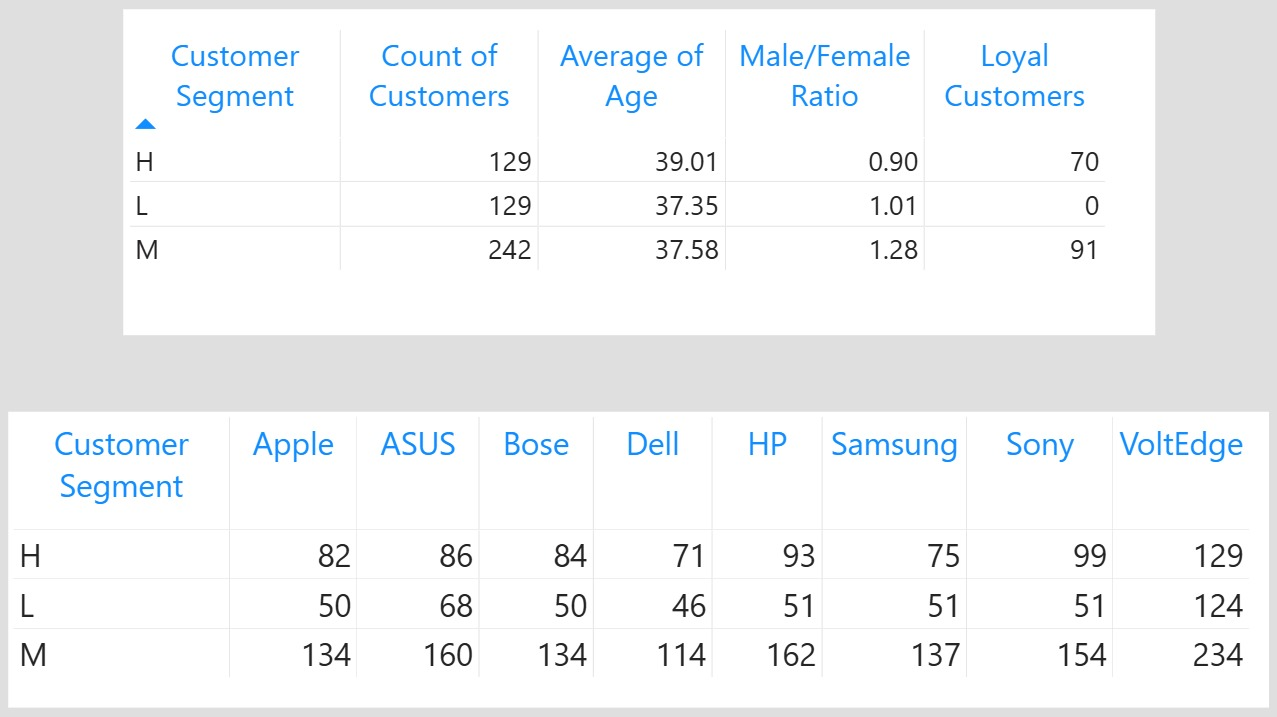

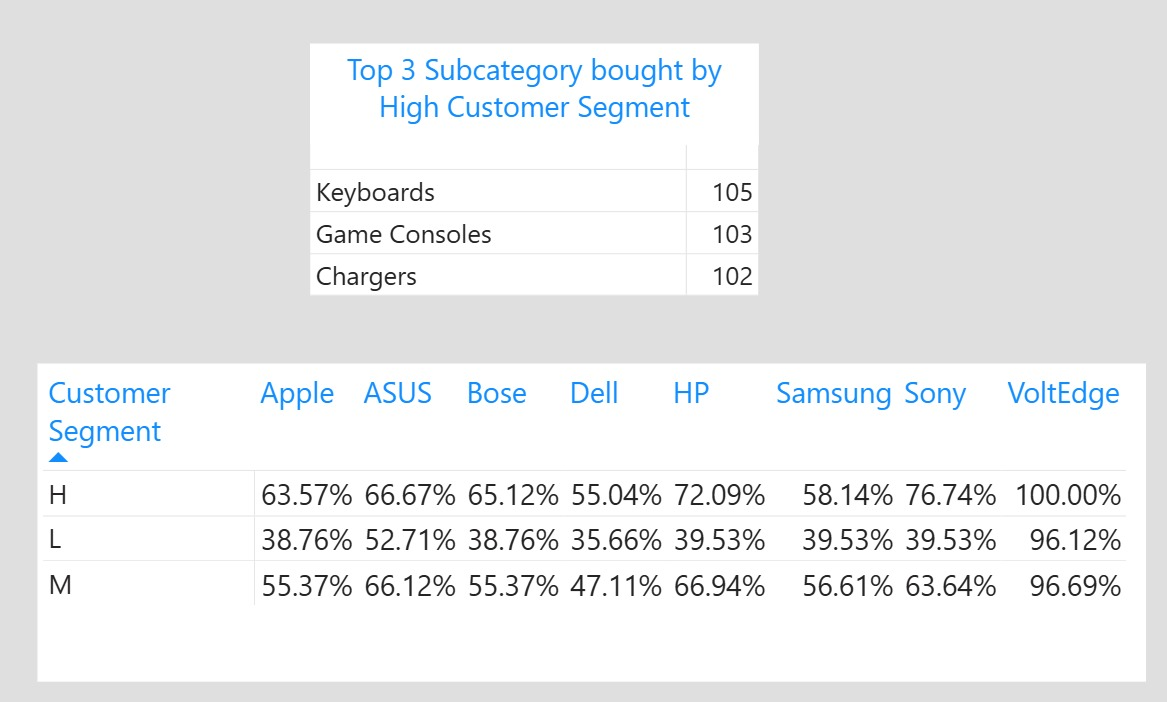

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/sheet_5.xlsx', sheet_name = 4, header = 2)
df.head()

,Unnamed: 0,CustomerID,CustomerName,Age,Gender,Visits to store,Last Visited,First Visited,Total spends 2024,AOV,...,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Customer Segment,Store Segment,Loyal?
0,NaN,C0001,Kendra Lindsey,29,Female,3,2024-07-17,2024-04-30,9699.12,3233.040000,...,Samsung,VoltEdge,Dell,Apple,NaN,NaN,NaN,L,NaN,NaN
1,NaN,C0002,John Rosales,21,Male,6,2024-10-12,2024-04-22,30554.49,5092.415000,...,Sony,HP,VoltEdge,Dell,Bose,Apple,NaN,H,NaN,NaN
2,NaN,C0003,Tina Santos,59,Female,3,2024-09-16,2024-03-03,8377.07,2792.356667,...,Sony,HP,VoltEdge,Dell,Apple,NaN,NaN,L,NaN,NaN
3,NaN,C0004,Luis Pruitt,44,Male,5,2024-08-30,2024-02-03,14319.88,2863.976000,...,HP,Samsung,VoltEdge,Dell,Bose,NaN,NaN,M,NaN,NaN
4,NaN,C0005,Erik Williams,46,Male,4,2024-08-29,2024-01-12,18727.93,4681.982500,...,VoltEdge,Dell,Bose,Apple,NaN,NaN,NaN,H,NaN,NaN


In [ ]:
mask = df.groupby(['Customer Segment'])[['Age']].agg(
    {
        'Age': 'mean',
    }
).reset_index()

In [ ]:
mask

,Customer Segment,Age
0,H,39.000000
1,L,37.651163
2,M,37.520661


In [ ]:
df.groupby(['Customer Segment', 'Gender']).size().unstack(fill_value=0)

Gender,Female,Male
Customer Segment,,
H,67,62
L,63,66
M,113,129


In [ ]:
gender_count = df.groupby(['Customer Segment', 'Gender']).size().unstack(fill_value=0)
gender_ratio = gender_count['Male'] / gender_count['Female']


In [ ]:
gender_count['total'] = gender_count['Female'] + gender_count['Male']

In [ ]:
gdf = gender_ratio.reset_index().rename(columns={0: 'Gender Ratio'})

In [ ]:
df['Mean Time between orders'].replace('-', 76, inplace=True)

/tmp/ipython-input-36-338091794.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Mean Time between orders'].replace('-', 76, inplace=True)


In [ ]:
loyal_customers = df[(df['Mean Time between orders'].astype('int') < 70) & (df['Visits to store'].astype('int') > 4)]
loyal_count = loyal_customers.groupby('Customer Segment').size()
ldf = loyal_count.reset_index().rename(columns={0: 'Loyal Count'})

In [ ]:
pd.merge(pd.merge(pd.merge(mask, gdf, on='Customer Segment'), ldf, on='Customer Segment', how = 'outer'), gender_count, on = 'Customer Segment').drop(columns=['Female','Male'])

,Customer Segment,Age,Gender Ratio,Loyal Count,total
0,H,39.000000,0.925373,66.0,129
1,L,37.651163,1.047619,NaN,129
2,M,37.520661,1.141593,85.0,242


In [ ]:
high_df = df[df['Customer Segment'] == 'H']

product_lists = high_df['Product subcategories bought'].str.split(';')

top3_products = pd.Series([item for sublist in product_lists for item in sublist]).value_counts().head(3)
top3_products

,count
Keyboards,105
Game Consoles,103
Chargers,102


In [ ]:
# Check if VoltEdge is one of the brands bought
df['Bought_VoltEdge'] = df[['Brand1', 'Brand2', 'Brand3', 'Brand4', 'Brand5', 'Brand6', 'Brand7', 'Brand8']].apply(
    lambda x: 'VoltEdge' in x.values, axis=1)

voltedge_counts = df.groupby('Customer Segment')['Bought_VoltEdge'].sum()
voltedge_counts = voltedge_counts.reset_index()
voltedge_counts['percentage'] = voltedge_counts['Bought_VoltEdge'] / gender_count.reset_index()['total']
voltedge_counts

,Customer Segment,Bought_VoltEdge,percentage
0,H,129,1.000000
1,L,124,0.961240
2,M,234,0.966942


In [ ]:
brand_columns = ['Brand1', 'Brand2', 'Brand3', 'Brand4', 'Brand5', 'Brand6', 'Brand7', 'Brand8']
df_melted = df.melt(id_vars=['CustomerID', 'Customer Segment'], value_vars=brand_columns, var_name='BrandCol', value_name='Brand')

In [ ]:
df_melted

,CustomerID,Customer Segment,BrandCol,Brand
0,C0001,L,Brand1,HP
1,C0002,H,Brand1,ASUS
2,C0003,L,Brand1,ASUS
3,C0004,M,Brand1,Sony
4,C0005,H,Brand1,HP
...,...,...,...,...
3995,C0496,M,Brand8,NaN
3996,C0497,H,Brand8,NaN
3997,C0498,M,Brand8,NaN
3998,C0499,H,Brand8,NaN


In [ ]:
df_melted.groupby(['Customer Segment', 'Brand'])['BrandCol'].count().unstack()

Brand,ASUS,Apple,Bose,Dell,HP,Samsung,Sony,VoltEdge
Customer Segment,,,,,,,,
H,86,82,84,71,93,75,99,129
L,68,50,50,46,51,51,51,124
M,160,134,134,114,162,137,154,234


### Que 7

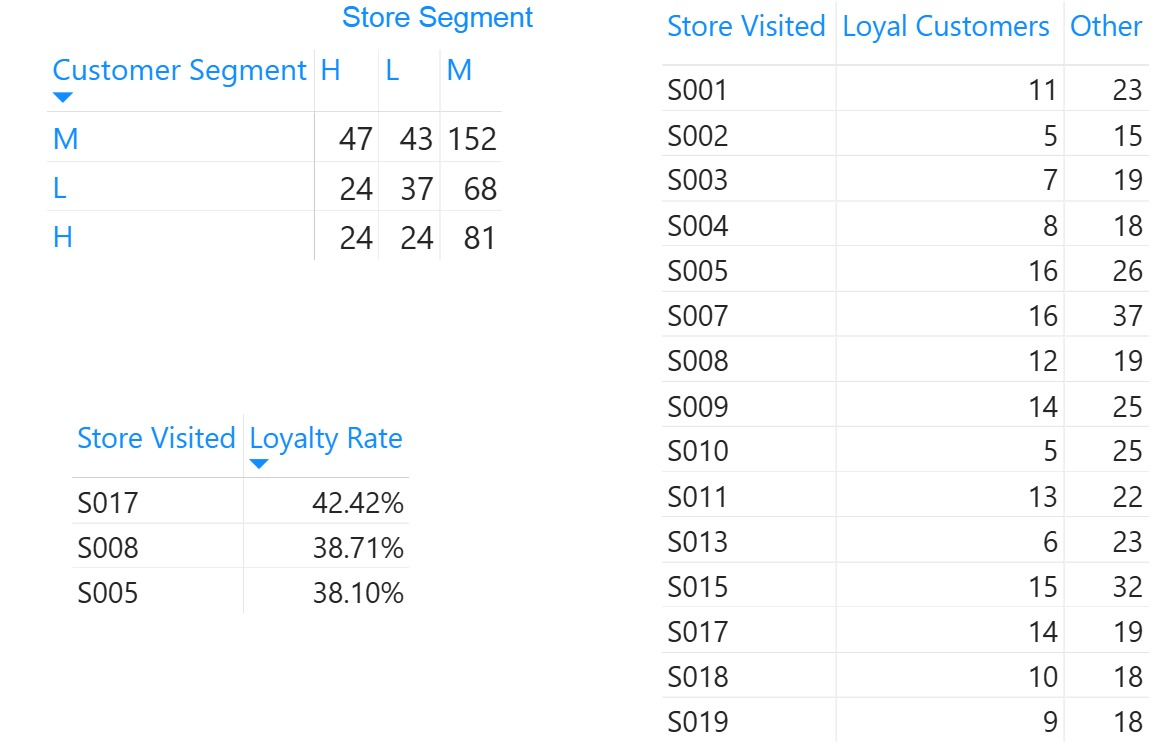

In [ ]:
customer_count = df.groupby('Store Visited')['Visits to store'].count().reset_index().rename(columns={'Visits to store': 'CustomerCount'})

In [ ]:
df1 = pd.merge(customer_count, df.groupby('Store Visit```ed')['AOV'].mean().reset_index(), on='Store Visited')

In [ ]:
total_aov = 3534

def get_store_segment(aov, customers):
    if aov > total_aov and customers > 40:
        return "H"
    elif customers >= 30 or aov > total_aov:
        return "M"
    else:
        return "L"
````
df1['Store Segment'] = df1.apply(lambda row: get_store_segment(row['AOV'], row['CustomerCount']), axis=1)
df1.drop(columns=['AOV', 'CustomerCount'], inplace = True)

df2 = pd.merge(df1, df, on='Store Visited').drop(columns=['Store Segment_y'])


In [ ]:
df2.groupby(['Customer Segment', 'Store Segment_x'])['CustomerID'].count().unstack()

Store Segment_x,H,L,M
Customer Segment,,,
H,24,24,81
L,24,37,68
M,47,43,152


In [ ]:
# customer_count['loyalty rate'] =
customer_count['CustomerCount'] / customer_count['CustomerCount'].sum() * 100

,CustomerCount
0,6.8
1,4.0
2,5.2
3,5.2
4,8.4
5,10.6
6,6.2
7,7.8
8,6.0
9,7.0
